In [2]:
import pandas as pd
import matplotlib.pyplot as plt


In [19]:
data  = pd.read_csv('data/InfantMortalityRate.csv', encoding='latin1')
data.dropna(inplace=True)
print(data.head())
print(data.info())

                Country  Infant Mortality Rate  Gender    Year
0           Afghanistan              43.050731  Female  2019.0
1                Angola              44.851045  Female  2019.0
2               Albania               7.659442  Female  2019.0
3               Andorra               2.555451  Female  2019.0
4  United Arab Emirates               5.716825  Female  2019.0
<class 'pandas.core.frame.DataFrame'>
Index: 7623 entries, 0 to 7622
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country                7623 non-null   object 
 1   Infant Mortality Rate  7623 non-null   float64
 2   Gender                 7623 non-null   object 
 3   Year                   7623 non-null   float64
dtypes: float64(2), object(2)
memory usage: 297.8+ KB
None


['Female' 'Male' 'Total']
[2541, 2541, 2541]


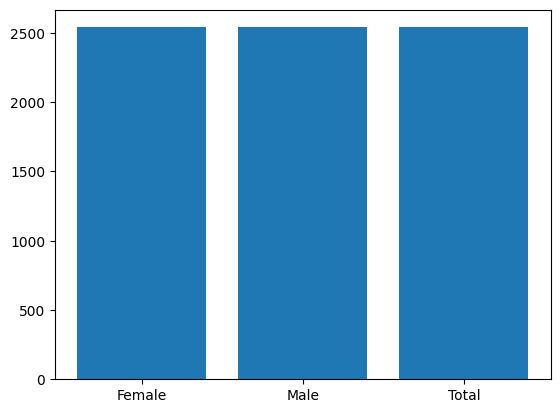

In [26]:
print(data['Gender'].unique())
print(data['Gender'].value_counts().to_list())
plt.bar(data['Gender'].unique(), data['Gender'].value_counts().to_list())
plt.show()

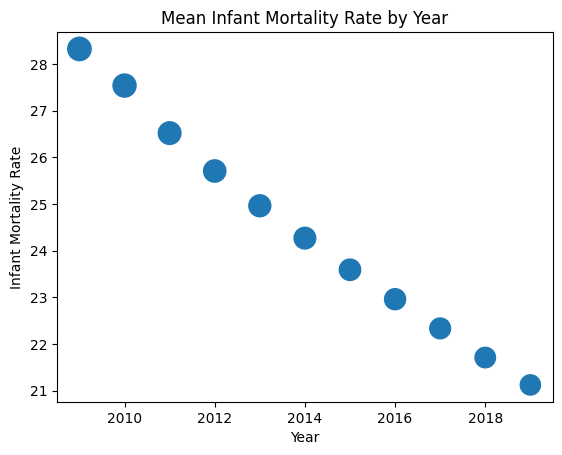

In [37]:
# Scatter plot
year_group = data.groupby('Year').mean('Infant Mortality Rate')
# print(year_group)
plt.scatter(year_group.index, year_group['Infant Mortality Rate'], sizes = year_group['Infant Mortality Rate']*10)
plt.xlabel('Year')
plt.ylabel('Infant Mortality Rate')
plt.title('Mean Infant Mortality Rate by Year')
plt.show()

        Infant Mortality Rate
Year                         
2009.0           19627.044784
2010.0           19083.258454
2011.0           18377.333347
2012.0           17814.958266
2013.0           17298.687103
2014.0           16818.126896
2015.0           16348.752984
2016.0           15911.700129
2017.0           15478.361825
2018.0           15045.480015
2019.0           14639.117323


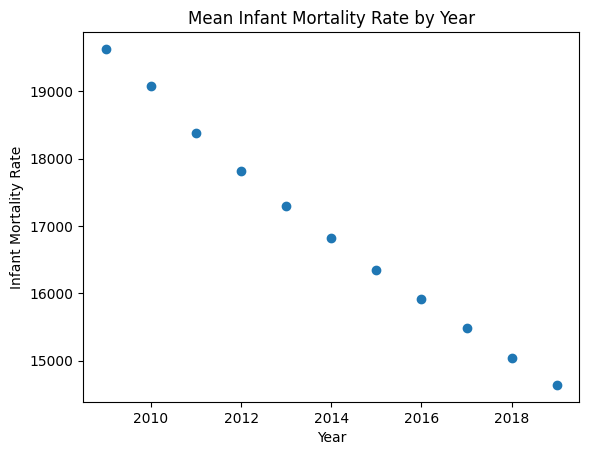

In [34]:
year_group = data.groupby('Year').sum('Infant Mortality Rate')
print(year_group)
plt.scatter(year_group.index, year_group['Infant Mortality Rate'])
plt.xlabel('Year')
plt.ylabel('Infant Mortality Rate')
plt.title('Mean Infant Mortality Rate by Year')
plt.show()

In [38]:
data['Country'].unique()

array(['Afghanistan', 'Angola', 'Albania', 'Andorra',
       'United Arab Emirates', 'Argentina', 'Armenia',
       'Antigua and Barbuda', 'Australia', 'Austria', 'Azerbaijan',
       'Burundi', 'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh',
       'Bulgaria', 'Bahrain', 'Bahamas', 'Bosnia and Herzegovina',
       'Belarus', 'Belize', 'Bolivia (Plurinational State of)', 'Brazil',
       'Barbados', 'Brunei Darussalam', 'Bhutan', 'Botswana',
       'Central African Republic', 'Canada', 'Switzerland', 'Chile',
       'China', "Côte d'Ivoire", 'Cameroon',
       'Democratic Republic of the Congo', 'Congo', 'Cook Islands',
       'Colombia', 'Comoros', 'Cabo Verde', 'Costa Rica', 'Cuba',
       'Cyprus', 'Czechia', 'Germany', 'Djibouti', 'Dominica', 'Denmark',
       'Dominican Republic', 'Algeria', 'Ecuador', 'Egypt', 'Eritrea',
       'Spain', 'Estonia', 'Ethiopia', 'Finland', 'Fiji', 'France',
       'Micronesia (Federated States of)', 'Gabon', 'United Kingdom',
       'Georgia', 'Gh

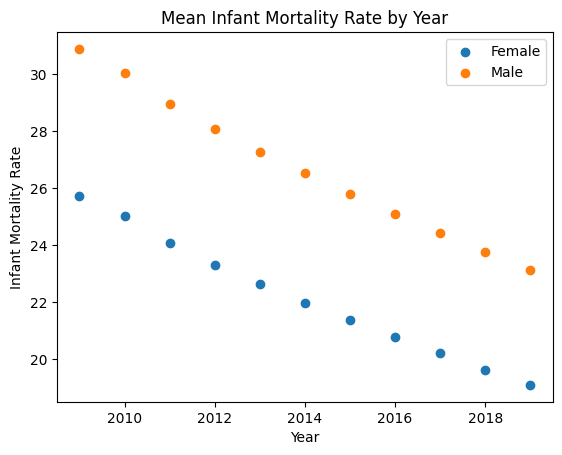

In [52]:
# Scatter plot for the mortality rate across years for each gender

year_gender_group = data.groupby(['Year', 'Gender']).mean('Infant Mortality Rate')
# get data for female gender from the group
female_data = year_gender_group.xs('Female', level='Gender')
male_data = year_gender_group.xs('Male', level='Gender')

plt.scatter(female_data.index, female_data['Infant Mortality Rate'])
plt.scatter(male_data.index, male_data['Infant Mortality Rate'])
plt.legend(["Female", "Male"])
plt.xlabel('Year')
plt.ylabel('Infant Mortality Rate')
plt.title('Mean Infant Mortality Rate by Year')
plt.show()